In [1]:
import numpy as np
from enum import Enum

# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline

# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties
# 日本語フォント
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)

# ipynbのインポート
import nbimporter
from common_data import get_calendar

Importing Jupyter notebook from common_data.ipynb


# 家電

## 3.洗濯機（ver自立P4）

### 3.1　定義

洗濯機の動作状態および機能は、以下を想定する。

* 稼働－洗濯
* 稼働－乾燥
* 停止

洗浄水を加温する装置が非搭載の場合には常温水のみ、搭載の場合には常温水と温水のいずれかが選択できる。温水の場合、加温方式は、ヒートポンプ式である。また、乾燥方式には、電気ヒータ式とヒートポンプ式とがある。

想定する動作状態および機能に対する添え字は、以下の通りである。

|機器の動作状態 |機器の機能 |添え字  |備考         |  
|:-------------:|:---------:|:------:|:-----------:|    
|稼働           |洗濯       |opg,wsh |-            |   
|稼働           |乾燥       |opg,dry |-            |   
|停止           |-          |-       |消費電力ゼロ |     

In [2]:
class HeatingDryingType(Enum):
    '''洗浄水加温方式および乾燥方式'''
    # Unequipped：非搭載
    # ElectricHeater：電気ヒータ式
    # HeatPump：ヒートポンプ式

    Unequipped = 'unequipped'
    ElectricHeater = 'electric_heater'
    HeatPump = 'heat_pump'

### 3.2　消費電力量

日付$d$の時刻$t$における洗濯機の単位時間当たりの消費電力量は、式(1)により表される。

$$ 
\begin{equation*}
    E_{E,LaundryMachine,d,t} = E_{E,opg,d,t}
\end{equation*}
$$


<div style="text-align: right;"> (1) </div>

ここで、  

$E_{E,LaundryMachine,d,t}$：日付$d$の時刻$t$における洗濯機の単位時間当たりの消費電力量[Wh]  
$E_{E,opg,d,t}$：日付$d$の時刻$t$における稼働時の単位時間当たりの消費電力量[Wh]   

である。

In [3]:
def EE_app (EE_opg):
    '''消費電力量[Wh]を計算する'''
    # EE_opg：稼働時の消費電力量[Wh]
    
    return EE_opg

日付$d$の時刻$t$における稼働時の単位時間当たりの消費電力量は、式(2)により計算される。

<p style="text-indent:2em">稼働時の消費電力量：</p>  
$$ 
\begin{equation*}
    E_{E,opg,d,t} = E_{E,opg,wsh,d,t} + E_{E,opg,dry,d,t}
\end{equation*}
$$

<div style="text-align: right;"> (2) </div>

ここで、  

$E_{E,opg,d,t}$：日付$d$の時刻$t$における稼働時の単位時間当たりの消費電力量[Wh]  
$E_{E,opg,wsh,d,t}$：日付$d$の時刻$t$において洗濯が機能することによる稼働時の単位時間当たりの消費電力量[Wh]   
$E_{E,opg,dry,d,t}$：日付$d$の時刻$t$において乾燥が機能することによる稼働時の単位時間当たりの消費電力量[Wh]   

である。

In [4]:
def EE_opg (EE_opg_wsh, EE_opg_dry):
    '''稼働時の消費電力量[Wh]を計算する'''
    # EE_opg_wsh：洗濯が機能することによる稼働時の消費電力量[Wh]
    # EE_opg_dry：乾燥が機能することによる稼働時の消費電力量[Wh]
    
    return EE_opg_wsh + EE_opg_dry

日付$d$の時刻$t$において洗濯および乾燥が機能することによる単位時間当たりの消費電力量は、式(3)および式(4)により計算される。

<p style="text-indent:2em">洗濯が機能することによる稼働時の消費電力量：</p>  
$$ 
\begin{equation*}
    E_{E,opg,wsh,d,t} = P_{opg,wsh,d} \times dt_{opg,wsh,d,t}  \div 3600
\end{equation*}
$$

<div style="text-align: right;"> (3) </div>

<p style="text-indent:2em">乾燥が機能することによる稼働時の消費電力量：</p>  
$$ 
\begin{equation*}
    E_{E,opg,dry,d,t} = P_{opg,dry,d} \times dt_{opg,dry,d,t}  \div 3600
\end{equation*}
$$

<div style="text-align: right;"> (4) </div>

ただし、式(5)を満たす。  

$$ 
\begin{equation*}
    dt_{opg,wsh,d,t} +dt_{opg,dry,d,t} \leq dt_{calc}
\end{equation*}
$$
<div style="text-align: right;"> (5) </div>

ここで、  

$dt_{opg,wsh,d,t}$：日付$d$の時刻$t$において洗濯が機能することによる稼働時間の合計[s]  
$dt_{opg,dry,d,t}$：日付$d$の時刻$t$において乾燥が機能することによる稼働時間の合計[s]  
$dt_{calc}$：単位時間[s]   
$E_{E,opg,wsh,d,t}$：日付$d$の時刻$t$において洗濯が機能することによる稼働時の単位時間当たりの消費電力量[Wh]  
$E_{E,opg,dry,d,t}$：日付$d$の時刻$t$において乾燥が機能することによる稼働時の単位時間当たりの消費電力量[Wh]  
$P_{opg,wsh}$：洗濯が機能することによる稼働時の平均消費電力[W]  
$P_{opg,dry}$：乾燥が機能することによる稼働時の平均消費電力[W]  

である。

In [5]:
def EE_opg_wsh (P_opg_wsh, dt_opg_wsh):
    '''洗濯が機能することによる稼働時の消費電力量[Wh]を計算する'''
    # P_opg_wsh：洗濯が機能することによる稼働時の平均消費電力[W] 
    # dt_opg_wsh：洗濯が機能することによる稼働時間の合計[s]
       
    return P_opg_wsh * dt_opg_wsh / 3600

In [6]:
def EE_opg_dry (P_opg_dry, dt_opg_dry):
    '''乾燥が機能することによる稼働時の消費電力量[Wh]を計算する'''
    # P_opg_wsh：乾燥が機能することによる稼働時の平均消費電力[W]  
    # dt_opg_wsh：乾燥が機能することによる稼働時間の合計[s]
  
    return P_opg_dry * dt_opg_dry / 3600

In [7]:
def check_duration (dt):
    '''合計が単位時間を超過しないか否かを確認する'''
    # dt：稼働時間の合計[s](list型)
    
    # dt_calc：単位時間[s]
    dt_calc = 3600.
    
    # 継続時間を積算する
    dt_sum = sum(dt)
    
    # エラーチェック
    if dt_calc < dt_sum:
        # 単位時間を超える場合 => エラー
        try:
            raise Exception('機器動作スケジュールに不正があります。')
        except Exception:
            raise
    else:
        pass

### 3.3　稼働時の消費電力

洗濯が機能することによる稼働時の平均消費電力$P_{opg,wsh}$は、洗浄水の種別に応じて式(6)により計算される。

<p style="text-indent:2em">洗濯が機能することによる稼働時の平均消費電力：</p>  
<p style="text-indent:4em">洗浄水を加温する装置が非搭載、もしくは搭載されているが常温水により洗濯を行う場合：</p>  
$$ 
\begin{equation*}
    P_{opg,wsh} = 1.3503 \times E_{E,rtd,wsh} -42.848
\end{equation*}
$$

<div style="text-align: right;"> (6-1) </div>

<p style="text-indent:4em">洗浄水を加温する装置が非搭載されており、温水により洗濯を行う場合：</p>  
$$ 
\begin{equation*}
    P_{opg,wsh} = 0.88 \times E_{E,rtd,wsh}
\end{equation*}
$$

<div style="text-align: right;"> (6-2) </div>

ここで、  

$E_{E,rtd,wsh}$：定格洗濯時消費電力量[Wh/回]    
$P_{opg,wsh}$：洗濯が機能することによる稼働時の平均消費電力[W]    

である。

In [8]:
def P_opg_wsh(water_heating_type, EE_rtd_wsh, wash_with_warm_water):
    '''洗濯が機能することによる稼働時の平均消費電力[W]を求める'''
    # water_heating_type：洗浄水加温方式[非搭載、ヒートポンプ式](Enum型)
    # EE_rtd_wsh：定格洗濯時消費電力量[Wh/回]   
    # wash_with_warm_water：温水による洗濯を行うか否か[True：温水による洗濯を行う、False：常温水による洗濯を行う](Boolean型)
    
    if wash_with_warm_water is False or water_heating_type == HeatingDryingType.Unequipped:
        return 1.3503 * EE_rtd_wsh -42.848
    elif wash_with_warm_water is True:
        if water_heating_type == HeatingDryingType.HeatPump:
            return 0.88 * EE_rtd_wsh
        else:
            raise Exception
    else:
        raise Exception

乾燥が機能することによる稼働時の平均消費電力$P_{opg,dry}$は、加温方式に応じて式(7)により計算される。

<p style="text-indent:2em">乾燥が機能することによる稼働時の平均消費電力：</p>  
<p style="text-indent:4em">乾燥機能を使用しない場合、もしくは乾燥機能が非搭載の場合：</p>  
$$ 
\begin{equation*}
    P_{opg,dry} = 0
\end{equation*}
$$

<div style="text-align: right;"> (7-1) </div>

<p style="text-indent:4em">乾燥機能を使用する場合で、乾燥方式が電気ヒータ式の場合：</p>  
$$ 
\begin{equation*}
    P_{opg,dry} = 0.992 \times P_{rtd,dry}
\end{equation*}
$$

<div style="text-align: right;"> (7-2) </div>

<p style="text-indent:4em">乾燥機能を使用する場合で、乾燥方式がヒートポンプ式の場合：</p>  
$$ 
\begin{equation*}
    P_{opg,dry} = 0.866 \times \left( E_{E,rtd,wsh+dry} - E_{E,rtd,wsh} \right) 
\end{equation*}
$$

<div style="text-align: right;"> (7-3) </div>

ここで、  


$E_{E,rtd,wsh}$：定格洗濯時消費電力量[Wh/回]    
$E_{E,rtd,wsh+dry}$：定格洗濯乾燥時消費電力量[Wh/回]    
$P_{opg,dry}$：乾燥が機能することによる稼働時の平均消費電力[W]  
$P_{rtd,dry}$：乾燥時最大消費電力[W]  

である。

In [9]:
def P_opg_dry(drying_type, Prtd_dry, EE_rtd_wsh, EE_rtd_wsh_dry, wash_and_dry):
    '''乾燥が機能することによる稼働時の平均消費電力[W]を求める'''
    # drying_type：乾燥方式[非搭載、電気ヒータ式、ヒートポンプ式](Enum型)
    # Prtd_dry：乾燥時最大消費電力[W]
    # EE_rtd_wsh：定格洗濯時消費電力量[Wh/回] 
    # EE_rtd_wsh_dry：定格洗濯乾燥時消費電力量[Wh/回]
    # wash_and_dry：乾燥機能を使用するか否か[True：使用する、False：使用しない](Boolean型)
    
    if wash_and_dry is False or drying_type == HeatingDryingType.Unequipped:
        return 0
    elif wash_and_dry is True:  
        if drying_type == HeatingDryingType.ElectricHeater:
            return 0.992 * P_rtd_dry
        elif drying_type == HeatingDryingType.HeatPump:
            return 0.866 * (EE_rtd_wsh_dry - EE_rtd_wsh)
        else:
            raise Exception
    else:
        raise Exception

### 3.4　標準条件

#### 3.4.1　機器仕様

4人世帯の標準的な機器仕様として、下表の設定を用いることができる。

|番号 |乾燥方式       |洗浄水加温方式 |乾燥時最大消費電力[W] |定格洗濯時消費電力量[Wh/回] |定格洗濯乾燥時消費電力量[Wh/回] |備考                |  
|:---:|:-------------:|:-------------:|:--------------------:|:--------------------------:|:------------------------------:|:-----------------:|
|00   |非搭載         |非搭載         |-                     |51                          |-                               |4人標準世帯の既定値 |  
|01   |電気ヒータ式   |非搭載         |1470                  |109                         |-                               |-                   |  
|02   |ヒートポンプ式 |ヒートポンプ式 |-                     |79                          |860                             |-                   |     

In [10]:
Spec  = {
    'LaundryMachine00' : {
        'drying_type'        : HeatingDryingType.Unequipped,
        'water_heating_type' : HeatingDryingType.Unequipped,
        'Prtd_dry'           : None,
        'EE_rtd_wsh'        : 51,
        'EE_rtd_wsh_dry'    : None
    }, 
    'LaundryMachine01' : {
        'drying_type'        : HeatingDryingType.ElectricHeater,
        'water_heating_type' : HeatingDryingType.Unequipped,
        'Prtd_dry'           : 1470,
        'EE_rtd_wsh'        : 109,
        'EE_rtd_wsh_dry'    : None
    },
    'LaundryMachine02' : {
        'drying_type'        : HeatingDryingType.HeatPump,
        'water_heating_type' : HeatingDryingType.HeatPump,
        'Prtd_dry'           : None,
        'EE_rtd_wsh'        : 79,
        'EE_rtd_wsh_dry'    : 860
    }
}

#### 3.4.2　機器動作スケジュール

4人世帯の標準的なスケジュールとして、下表の設定を用いることができる。

|番号 |スケジュール名称            |備考                |
|:---:|:--------------------------:|:------------------:|
|00   |4人標準世帯（洗濯のみ）     |4人標準世帯の既定値 |

<p style="text-indent:2em">平日：</p>  

|時刻                   |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---------------------:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間_洗濯[\* 60 s] |  0|  0|  0|  0|  0|  0|  0| 60|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  
|稼働時間_乾燥[\* 60 s] |  0|  0|  0|  0|  0|  0|  0|  0| 60| 60|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 
|停止時間　　 [\* 60 s] | 60| 60| 60| 60| 60| 60| 60|  0|  0|  0| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60|

<p style="text-indent:2em">休日在宅：</p>  

|時刻                   |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---------------------:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間_洗濯[\* 60 s] |  0|  0|  0|  0|  0|  0|  0|　0| 60|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  
|稼働時間_乾燥[\* 60 s] |  0|  0|  0|  0|  0|  0|  0|  0|  0| 60| 60|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 
|停止時間　　 [\* 60 s] | 60| 60| 60| 60| 60| 60| 60| 60|  0|  0|  0| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60|

<p style="text-indent:2em">休日外出：</p>  

|時刻                   |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---------------------:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間_洗濯[\* 60 s] |  0|  0|  0|  0|  0|  0|  0|　0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  
|稼働時間_乾燥[\* 60 s] |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 
|停止時間　　 [\* 60 s] | 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60|

In [11]:
Schedule = {
    '4p_standard' : {
        'Weekdays' : {
            'opg_wsh' : [0]*7 + [3600]*1 + [0]   *2 + [0]*14,
            'opg_dry' : [0]*7 + [0]   *1 + [3600]*2 + [0]*14
        },
        'Holidays_st' : {
            'opg_wsh' : [0]*8 + [3600]*1 + [0]   *2 + [0]*13,
            'opg_dry' : [0]*8 + [0]   *1 + [3600]*2 + [0]*13
        },
        'Holidays_go' : {
            'opg_wsh' : [0]*24,
            'opg_dry' : [0]*24
        }
    }
}

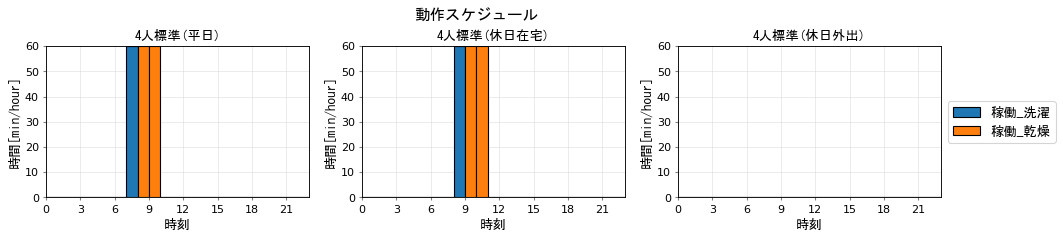

In [12]:
# 機器動作スケジュールの確認  
chart_title = '動作スケジュール'
schedule_name = ('4p_standard','4人標準' )
time_use_types = [ ('Weekdays','平日'), ('Holidays_st','休日在宅'), ('Holidays_go','休日外出') ]
app_status_types = [ ('opg_wsh','稼働_洗濯'), ('opg_dry','稼働_乾燥')]

y_value_sets = Schedule[schedule_name[0]] 


# サブプロットの作成
plt.figure(figsize=(12, 3), dpi=80)

# サブプロットのタイトル
plt.suptitle(chart_title, fontdict={'fontproperties':fp}, fontsize=14)

for i, time_use_type in enumerate(time_use_types):
    # サブプロットの指定
    ax = plt.subplot2grid((1, 3), (0, i))
    # グラフのタイル
    ax.set_title(schedule_name[1] +'(' + time_use_type[1] + ')' , fontdict={'fontproperties':fp})
    
    # x軸の値
    x_value = [k for k in range(24)]
    # y軸の値
    y_values = y_value_sets[time_use_type[0]]
    
    for j, app_status_type in enumerate(app_status_types):
        y_value = np.array(y_values[app_status_type[0]]) / 60
        if j == 0:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1])
            y_bottom = y_value
        else:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1], bottom=y_bottom)
            y_bottom = y_value       
   
    # x軸の設定
    ax.set_xlabel('時刻', fontdict={'fontproperties':fp})
    ax.set_xticks(np.arange(0, 25, 3), minor=False)
    ax.set_xbound(lower=0, upper=23)
    # y軸の設定
    ax.set_ylabel('時間[min/hour]', fontdict={'fontproperties':fp})
    ax.set_yticks(np.arange(0, 70, 10), minor=False)
    ax.set_ybound(lower=0, upper=60)
    # 目盛りの設定
    ax.grid(which='major', color='lightgray', alpha=0.5, linestyle='-')     
    ax.tick_params(direction='out', length=3, width=1, color='gray')
    ax.set_axisbelow(True) 

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()
plt.subplots_adjust(top=0.82)    
plt.show()

#### 3.4.3　洗濯および乾燥の機能に関する居住者の使用行動

居住者の使用行動は、以下の3パターンを想定する。

|番号 |概要                           |備考                |
|:---:|:-----------------------------:|:------------------:|
|00   |常温水による洗濯のみを行う     |4人標準世帯の既定値 |
|01   |常温水による洗濯と乾燥を行う   |-                   |
|02   |温水による洗濯および乾燥を行う |-                   |

In [13]:
UserBehavior = {
    'UserBehavior00' : {
        'wash_with_warm_water': False,
        'wash_and_dry'        : False
    },
    'UserBehavior01' :  {
        'wash_with_warm_water': False,
        'wash_and_dry'        : True
    },
    'UserBehavior02' :  {
        'wash_with_warm_water': True,
        'wash_and_dry'        : True
    }
}

### 付録1：サンプルコード

4人標準世帯の標準条件について、サンプルコードを示す。

In [14]:
def get_spec(app_type):
    '''機器仕様を取得する'''
    # app_type：機器タイプ
    
    # 機器仕様の取得
    try:
        spec = Spec[app_type]
    except:
        raise Exception('機器タイプの入力に不正があります。')     
    
    drying_type = spec['drying_type']
    water_heating_type = spec['water_heating_type']
    Prtd_dry = spec['Prtd_dry']
    EE_rtd_wsh = spec['EE_rtd_wsh']
    EE_rtd_wsh_dry = spec['EE_rtd_wsh_dry']
    
    return drying_type, water_heating_type, Prtd_dry, EE_rtd_wsh, EE_rtd_wsh_dry

Example:

In [15]:
ex_drying_type, ex_water_heating_type, ex_Prtd_dry, ex_EE_rtd_wsh, ex_EE_rtd_wsh_dry = get_spec('LaundryMachine00')
ex_drying_type, ex_water_heating_type, ex_Prtd_dry, ex_EE_rtd_wsh, ex_EE_rtd_wsh_dry

(<HeatingDryingType.Unequipped: 'unequipped'>,
 <HeatingDryingType.Unequipped: 'unequipped'>,
 None,
 51,
 None)

In [16]:
def get_dt(time_use_type, time_of_day, schedule_name):
    '''機器動作スケジュールを取得する'''
    # time_use_type：['Weekdays', 'Holidays_st', 'Holidays_go']
    # time_of_day：時刻（0-23）
    # schedule_name：スケジュール名
     
    # スケジュールの取得
    try:
        schedule_set = Schedule[schedule_name][time_use_type]
    except:
        raise Exception('スケジュール名の入力に不正があります。')    
               
    # 動作状態のタイプ
    app_status_types = list(schedule_set)
    
    # 動作状態ごとの継続時間[s]の取得
    for i, app_status_type in enumerate(app_status_types):
        if app_status_type == 'opg_wsh':
            dt_opg_wsh = schedule_set[app_status_type][time_of_day]
        elif app_status_type == 'opg_dry':
            dt_opg_dry = schedule_set[app_status_type][time_of_day]
        else:
            raise Exception
            
    # 時間超過の確認
    check_duration([dt_opg_wsh, dt_opg_dry]) 
  
    return dt_opg_wsh, dt_opg_dry

Example:

In [17]:
ex_dt_opg_wsh, ex_dt_opg_dry = get_dt('Weekdays', 7, '4p_standard' )
ex_dt_opg_wsh, ex_dt_opg_dry

(3600, 0)

In [18]:
def get_user_behavior(user_behavior_type):
    '''居住者の使用行動を取得する'''
    # user_behavior_type：居住者の使用行動タイプ
    
    # 居住者の使用行動の取得
    try:
        user_behavior = UserBehavior[user_behavior_type]
    except:
        raise Exception('居住者の使用行動タイプの入力に不正があります。')     
        
    wash_with_warm_water = user_behavior['wash_with_warm_water']
    wash_and_dry = user_behavior['wash_and_dry']
    
    return wash_with_warm_water, wash_and_dry

Example:

In [19]:
ex_wash_with_warm_water, ex_wash_and_dry = get_user_behavior('UserBehavior00')
ex_wash_with_warm_water, ex_wash_and_dry

(False, False)

In [20]:
def calc_EE_opg(drying_type, water_heating_type, Prtd_dry, EE_rtd_wsh, EE_rtd_wsh_dry, 
                dt_opg_wsh, dt_opg_dry,
                wash_with_warm_water, wash_and_dry):
    '''稼働時における消費電力量[Wh]を計算する'''
    # drying_type：乾燥方式[非搭載、電気ヒータ式、ヒートポンプ式](Enum型)
    # water_heating_type：洗浄水加温方式[非搭載、ヒートポンプ式](Enum型)
    # Prtd_dry：乾燥時最大消費電力[W]
    # EE_rtd_wsh：定格洗濯時消費電力量[Wh/回] 
    # EE_rtd_wsh_dry：定格洗濯乾燥時消費電力量[Wh/回]
    # dt_opg_wsh：洗濯が機能することによる稼働時間の合計[s]
    # dt_opg_wsh：乾燥が機能することによる稼働時間の合計[s]
    # wash_and_dry：乾燥機能を使用するか否か[True：使用する、False：使用しない](Boolean型)
    # wash_with_warm_water：温水による洗濯を行うか否か[True：温水による洗濯を行う、False：常温水による洗濯を行う](Boolean型)

    # 洗濯が機能することによる稼働時の消費電力[W]
    p_opg_wsh = P_opg_wsh(water_heating_type, EE_rtd_wsh, wash_with_warm_water)
    # 洗濯が機能することによる稼働時の消費電力量[Wh]
    ee_opg_wsh = EE_opg_wsh(p_opg_wsh, dt_opg_wsh)
    
    # 乾燥が機能することによる稼働時の消費電力[W]
    p_opg_dry = P_opg_dry(drying_type, Prtd_dry, EE_rtd_wsh, EE_rtd_wsh_dry, wash_and_dry)
    # 乾燥が機能することによる稼働時の消費電力量[Wh]
    ee_opg_dry = EE_opg_dry(p_opg_dry, dt_opg_dry)
    
    # 稼働時における消費電力量[Wh]
    ee_opg = EE_opg (ee_opg_wsh, ee_opg_dry)
    
    return  ee_opg

Example:

In [21]:
ex_EE_opg = calc_EE_opg(ex_drying_type, ex_water_heating_type, ex_Prtd_dry, ex_EE_rtd_wsh, ex_EE_rtd_wsh_dry,
                        ex_dt_opg_wsh, ex_dt_opg_dry,
                        ex_wash_with_warm_water, ex_wash_and_dry )
ex_EE_opg

26.01730000000001

In [22]:
def calc_EE_app(EE_opg):
    '''洗濯機の消費電力量[Wh]を計算する'''
    # EE_opg：稼働時における消費電力量[Wh]
    
    return EE_app(EE_opg)

Example:

In [23]:
ex_EE_app = calc_EE_app(ex_EE_opg)
ex_EE_app

26.01730000000001

In [24]:
def calc_EE_Laundry_Machine_verP4(time_use_type, time_of_day, 
                             app_type, schedule_name, user_behavior_type):
    '''洗濯機の単位時間当たりの消費電力量を計算する（ver自立P4）'''
    # time_use_type：['Weekdays', 'Holidays_st', 'Holidays_go']
    # time_of_day：時刻（0-23） 
    # app_type：機器タイプ  
    # schedule_name：スケジュール名 ['4p_standard']
    # user_behavior_type：使用行動タイプ 
    
    # 機器動作スケジュール[s]を取得
    dt_opg_wsh, dt_opg_dry = get_dt(time_use_type, time_of_day, schedule_name)
    
    # 機器仕様を取得
    drying_type, water_heating_type, Prtd_dry, EE_rtd_wsh, EE_rtd_wsh_dry = get_spec(app_type)
    
    # 使用行動を取得
    wash_with_warm_water, wash_and_dry = get_user_behavior(user_behavior_type)
    
    # 稼働時における消費電力量[Wh]を計算
    EE_opg = calc_EE_opg(drying_type, water_heating_type, Prtd_dry, EE_rtd_wsh, EE_rtd_wsh_dry, 
                         dt_opg_wsh, dt_opg_dry, 
                         wash_with_warm_water, wash_and_dry)
    
    # 消費電力量[Wh]を計算
    EE_app = calc_EE_app (EE_opg)
    
    return EE_app, EE_opg

Example:

In [25]:
ex_EE_Refrigerator = calc_EE_Laundry_Machine_verP4('Weekdays', 7, 
                             'LaundryMachine00', '4p_standard', 'UserBehavior00')
ex_EE_Refrigerator

(26.01730000000001, 26.01730000000001)

### 付録2：サンプルコードによる時刻別消費電力量の計算例

4人標準世帯の標準条件に対して、サンプルコードにより平日、休日在宅、休日外出の時刻別消費電力量を計算した結果を示す。

In [26]:
# 消費電力量の計算
# 入力
time_use_type = [['Weekdays'], ['Holidays_st'], ['Holidays_go']]
time_of_day = [i for i in range(0, 24, 1)]
app_type = 'LaundryMachine00'
schedule_name = '4p_standard'
user_behavior_type = 'UserBehavior00'

# 消費電力量の計算
ee_app, ee_opg = np.vectorize(calc_EE_Laundry_Machine_verP4)(time_use_type, time_of_day,
                                                             app_type, schedule_name, user_behavior_type)

# 消費電力量の計算結果
EE_Results= {
    'Weekdays' : {
        'opg' : ee_opg[0],
    },
    'Holidays_st' : {
        'opg' : ee_opg[1],
    },
    'Holidays_go' : {
        'opg' : ee_opg[2],
    }
}

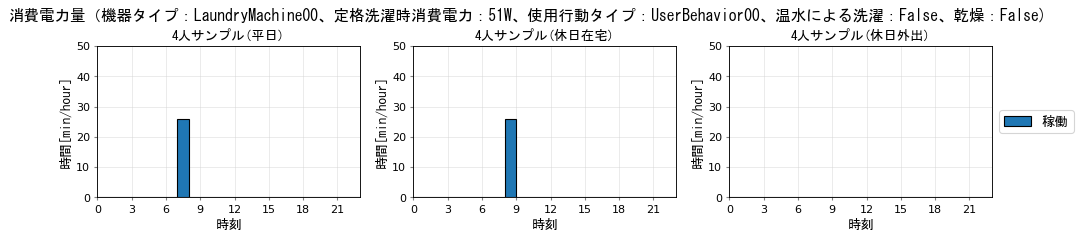

In [27]:
# 消費電力量の計算結果のグラフ 
chart_title = '消費電力量（' \
                + '機器タイプ：' + app_type + '、' \
                + '定格洗濯時消費電力：' + str(Spec[app_type]['EE_rtd_wsh']) + 'W、' \
                + '使用行動タイプ：' +user_behavior_type + '、' \
                + '温水による洗濯：' + str(UserBehavior[user_behavior_type]['wash_with_warm_water']) + '、' \
                + '乾燥：' + str(UserBehavior[user_behavior_type]['wash_and_dry']) \
                + ')'
schedule_name = ('4p_sample','4人サンプル' )
time_use_types = [ ('Weekdays','平日'), ('Holidays_st','休日在宅'), ('Holidays_go','休日外出') ]
app_status_types = [ ('opg','稼働')]

y_value_sets = EE_Results


# サブプロットの作成
plt.figure(figsize=(12, 3), dpi=80)

# サブプロットのタイトル
plt.suptitle(chart_title, fontdict={'fontproperties':fp}, fontsize=14)

for i, time_use_type in enumerate(time_use_types):
    # サブプロットの指定
    ax = plt.subplot2grid((1, 3), (0, i))
    # グラフのタイル
    ax.set_title(schedule_name[1] +'(' + time_use_type[1] + ')' , fontdict={'fontproperties':fp})
    
    # x軸の値
    x_value = [k for k in range(24)]
    # y軸の値
    y_values = y_value_sets[time_use_type[0]]
    
    for j, app_status_type in enumerate(app_status_types):
        y_value = y_values[app_status_type[0]]
        if j == 0:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1])
            y_bottom = y_value
        else:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1], bottom=y_bottom)
            y_bottom = y_value       
   
    # x軸の設定
    ax.set_xlabel('時刻', fontdict={'fontproperties':fp})
    ax.set_xticks(np.arange(0, 25, 3), minor=False)
    ax.set_xbound(lower=0, upper=23)
    # y軸の設定
    ax.set_ylabel('時間[min/hour]', fontdict={'fontproperties':fp})
    ax.set_yticks(np.arange(0, 100, 10), minor=False)
    ax.set_ybound(lower=0, upper=50)
    # 目盛りの設定
    ax.grid(which='major', color='lightgray', alpha=0.5, linestyle='-')     
    ax.tick_params(direction='out', length=3, width=1, color='gray')
    ax.set_axisbelow(True) 

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()
plt.subplots_adjust(top=0.82)    
plt.show()

### 付録3：サンプルコードによる年間消費電力量の計算例

4人標準世帯の標準条件に対して、サンプルコードにより年間消費電力量を計算した結果を示す。

In [28]:
def calc_annual_EE_app(app_type, schedule_name, user_behavior_type):
    '''年間消費電力量[Wh/year]を計算する'''
    # app_type：機器タイプ  
    # schedule_name：スケジュール名 ['4p_standard']
    # theta_ex_ave：外気温度の日平均値[C]
    # user_behavior_type：使用行動タイプ 

    def calc_daily_EE_app(schedule, app_type, schedule_name, user_behavior_type):
        '''1日あたりの消費電力量[Wh/day]を計算する'''
        hourly_EE_app = [ calc_EE_Laundry_Machine_verP4(schedule, t, 
                                                    app_type, schedule_name, 
                                                    user_behavior_type)[1] for t in range(0, 24, 1) ]
        return sum( hourly_EE_app )
    
    daily_EE_app = [ calc_daily_EE_app(schedule, 
                                     app_type, schedule_name, 
                                     user_behavior_type) for i, schedule in  enumerate(get_calendar()) ]
    return sum( daily_EE_app )

In [29]:
# 年間消費電力量[kWh/year]
ex_annual_EE_app = calc_annual_EE_app('LaundryMachine00', '4p_standard', 'UserBehavior00')
print('年間消費電力量：' + str(ex_annual_EE_app/1000) + ' kWh/年')

年間消費電力量：8.715795500000056 kWh/年
